# ID5059 Group Coursework 
## Weather Prediction

### Data Preprocessing

In [1]:
from pathlib import Path
import pandas as pd
import plotnine as p9
import numpy as np
import seaborn as sns


In [2]:
randomSeed = 1

In [6]:
# function reads in data from file
def loadData(fileName, filePath = "./", deliniator = ","):
    path = Path() / filePath / fileName; print(path)
    if not path.is_file():
        raise Exception("File not found")
    
    return pd.read_csv(path, sep = deliniator)

In [11]:
# read in training data
# no need to load in test data until it needs to be used
# takes ~20s to run
filePath = "./"

dataTrain = loadData("train.csv", filePath)

train.csv


In [5]:
dataTrain.shape

(13288920, 13)

In [6]:
dataTrain.head(2)

,id,valid_time,latitude,longitude,tp,u10,v10,sp,u100,v100,tcc,ptype,t2m
0,1,2018-01-01 00:00:00,59.0,-8.00,0.000004,1.405868,-1.367767,98134.81,1.516388,-1.468002,0.968842,1.0,279.75903
1,2,2018-01-01 00:00:00,59.0,-7.75,0.000017,2.151962,-1.555267,98086.81,2.239044,-1.634994,0.978790,1.0,279.61255


We see that the data has a unique identifier, "id". This interferes with the model making predictions, and is, therefore, dropped.

In [7]:
dataTrain.drop(["id"], axis = 1, inplace = True)
print(dataTrain.shape)
dataTrain.head(2)

(13288920, 12)


,valid_time,latitude,longitude,tp,u10,v10,sp,u100,v100,tcc,ptype,t2m
0,2018-01-01 00:00:00,59.0,-8.00,0.000004,1.405868,-1.367767,98134.81,1.516388,-1.468002,0.968842,1.0,279.75903
1,2018-01-01 00:00:00,59.0,-7.75,0.000017,2.151962,-1.555267,98086.81,2.239044,-1.634994,0.978790,1.0,279.61255


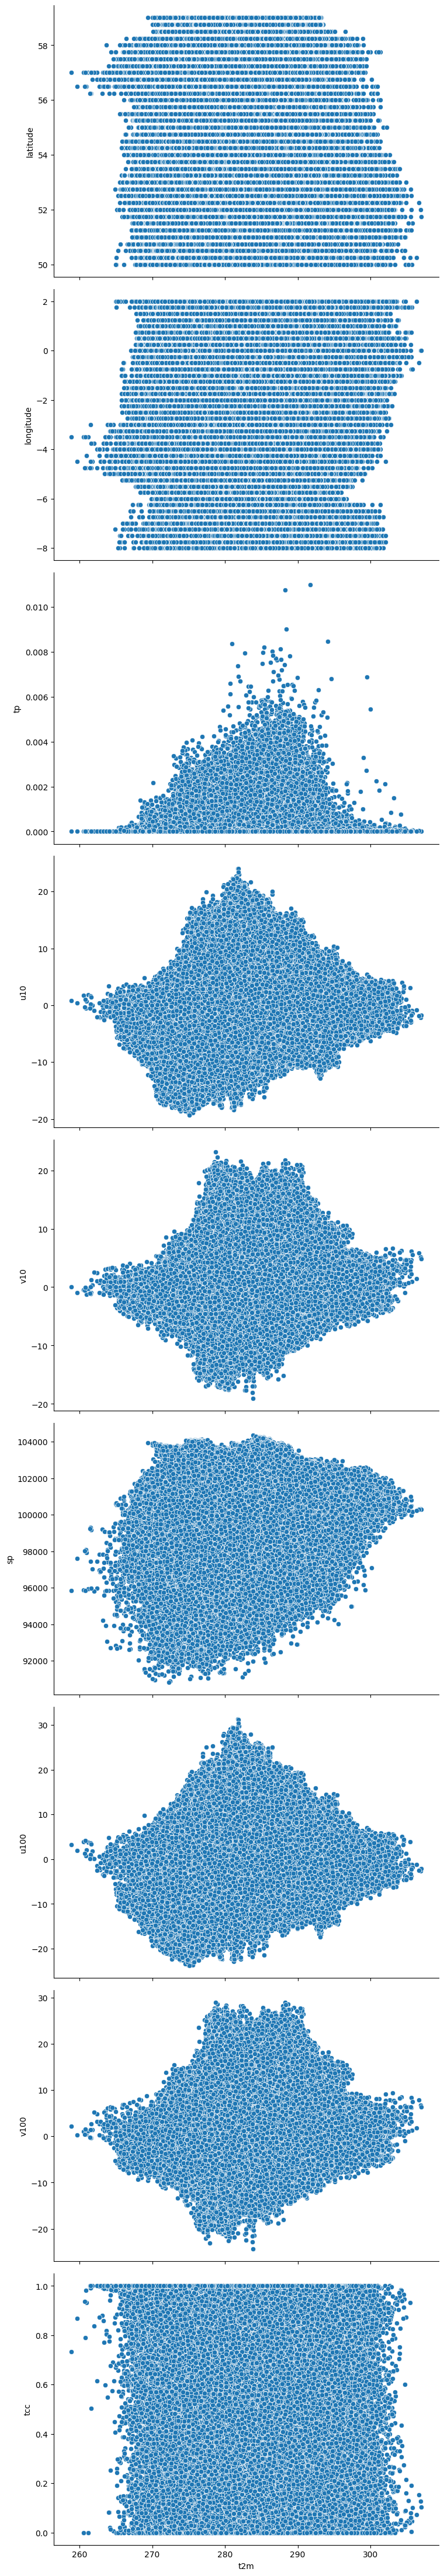

In [19]:
# plotting distributions for each variable
# running with all entries in dataset takes >10mins
# therefore run with random sample n from dataset
def plotResponseDistributions(data, n, x, y):
    g = sns.PairGrid(data.sample(n), x_vars = x, y_vars = y, height = 5, aspect = 1.5)
    g.map(sns.scatterplot)

n = int( 0.1 * dataTrain.shape[0] )    
plotResponseDistributions(dataTrain, n, ["t2m"], dataTrain.columns.tolist()[1:-2])

The above plots show the distribution of the variables against the response (excluding valid_time, and ptype, for being datetime and categoric data respectively). We can see that "tcc" is uniformly disributed with the response i.e. it is completely uncorrelated/unrelated with the response, and can, therefore, be discarded from further analysis.

The latitude, and longitude values have distributions which appear to vary with temperature, suggesting they are related. This matches our experience in the real world.

We see that the distributions for the windspeed variables: u10, v10, u100, and v100 have cross shapes. The 100 metre height winds have a wider, less tight, cross shape than the lower, 10 metre winds.

The total precipitation has a "bell"-ish shaped distribution with temperature. This makes sense, because for sufficiently high and low temperatures (near the UK) there is no rain, and there is no snow. Thus, rainy temperatures occur near the centre of the distribution.

The surface pressure distribution also shows a relation with the temperature, and should be analysed further.